In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037.csv")


**1. Data Exploration and Understanding:**

• Dataset Overview:

1. Load the dataset and display the first 10 rows.

In [79]:
print(df.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

Identify the number of rows and columns in the dataset.

In [80]:
rows,columns = df.shape
print(f"Rows:{rows}")
print(f"Columns:{columns}")

Rows:143
Columns:9


3. List all the columns and their data types.

In [81]:
print(df.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**• Basic Statistics:**

Calculate the mean, median, and standard deviation for the Score column.

In [82]:
mean = df['score'].mean()
median = df['score'].median()
std_dev = df['score'].std()

print(f"Mean:{mean}")
print(f"Meadian:{median}")
print(f"Standard Deviation:{std_dev}")

Mean:5.52758041958042
Meadian:5.785
Standard Deviation:1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [83]:
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"Country with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


**• Missing Values:**

1. Check if there are any missing values in the dataset. If so, display the total count

In [84]:
missing_values = df.isnull().sum()
print(missing_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**• Filtering and Sorting:**

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [85]:
filtered_df = df[df['score'] > 7.5]
print(filtered_df)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2.For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [86]:
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)

print("Top countries sorted by Log GDP per capita:")
print(sorted_df)

Top countries sorted by Log GDP per capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [87]:
import numpy as np

# Define conditions for categories
conditions = [
    df['score'] < 4,                # Low
    (df['score'] >= 4) & (df['score'] <= 6),  # Medium
    df['score'] > 6                # High
]

# Define the corresponding categories
categories = ['Low', 'Medium', 'High']

# Create the new column
df['Happiness Category'] = np.select(conditions, categories)

print(df)

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

**2. Data Visualizations:**

<ipython-input-88-f6e63d482832>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


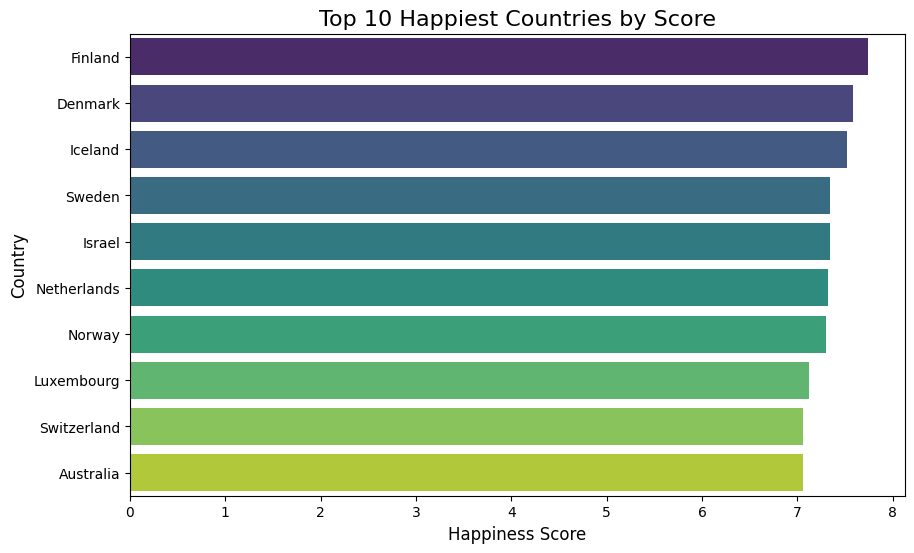

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by score and select the top 10 happiest countries
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by Score', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()


• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

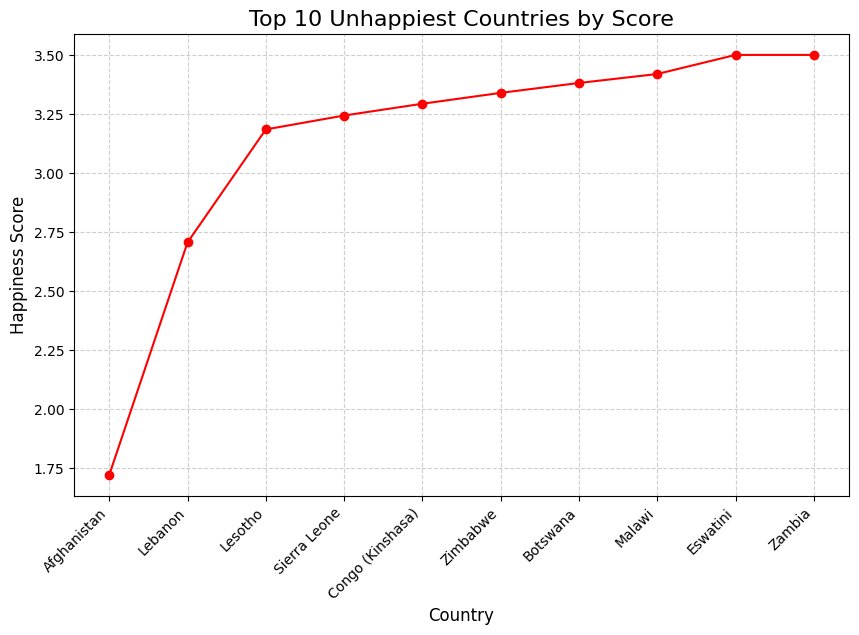

In [89]:

top_10_unhappiest = df.sort_values(by='score', ascending=True).head(10)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red', linestyle='-')
plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()


• Plot a histogram for the Score column to show its distribution and also interpret.

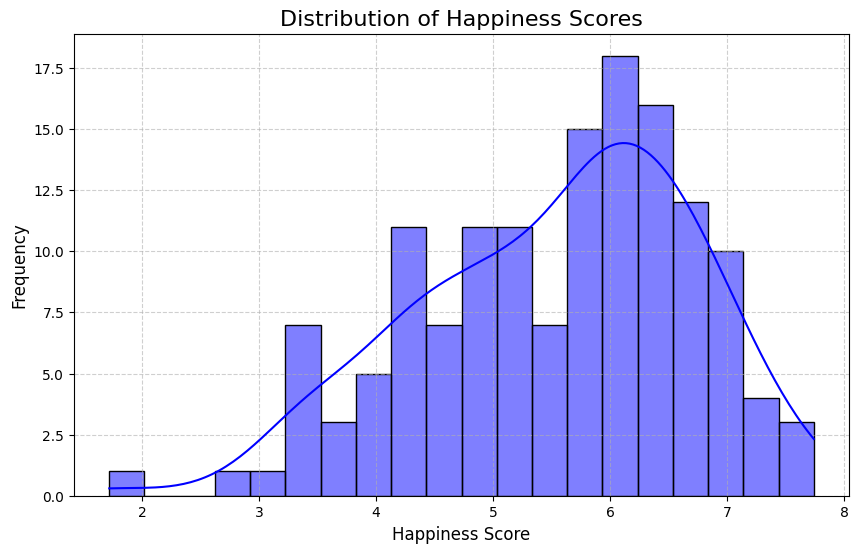

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

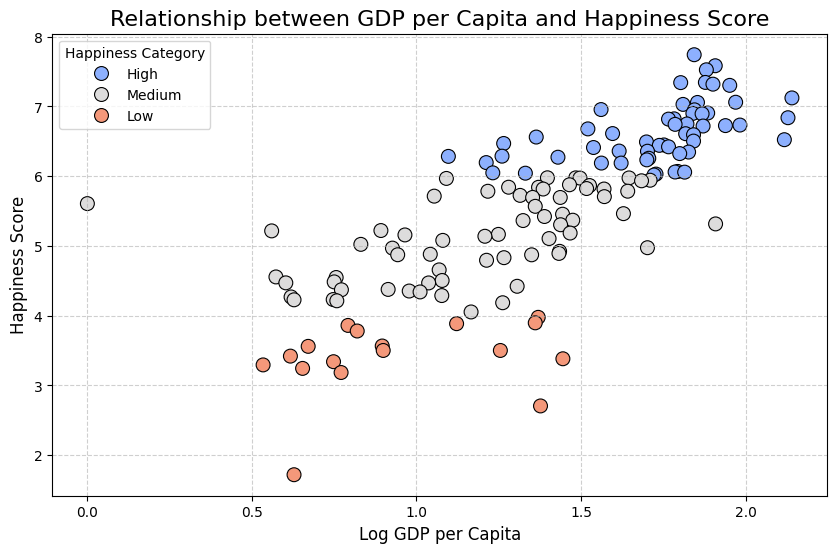

In [91]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='coolwarm', s=100, edgecolor='black')
plt.title('Relationship between GDP per Capita and Happiness Score', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend(title='Happiness Category', loc='upper left')
plt.show()


**Problem - 2 - Some Advance Data Exploration Task:**

Task - 1

Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]




In [92]:
# Step 1
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Srilanka"
]


2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [93]:
# Step 2
south_asia_data = df[df['Country name'].isin(south_asian_countries)]

3. Save the filtered dataframe as separate CSV files for future use.

In [94]:
# Step 3
output_path = '/content/drive/MyDrive/South_Asia_Dataset.csv'
south_asia_data.to_csv(output_path, index=False)

# Display the filtered data
south_asia_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


**Task - 2 - Composite Score Ranking:**

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support


+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.



1.Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

0.30 × Healthy Life Expectancy

In [95]:
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

<ipython-input-95-d3a89e1f85e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

<ipython-input-96-714ec6a80418>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_south_asia, palette='Blues_r')


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
125        India  4.054               1.166           0.653   
107     Pakistan  4.657               1.069           0.600   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
125                    0.417                         0.767       0.174   
107                    0.321                         0.542       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
92                       0.115                1.783             Medium   
125                      0.1

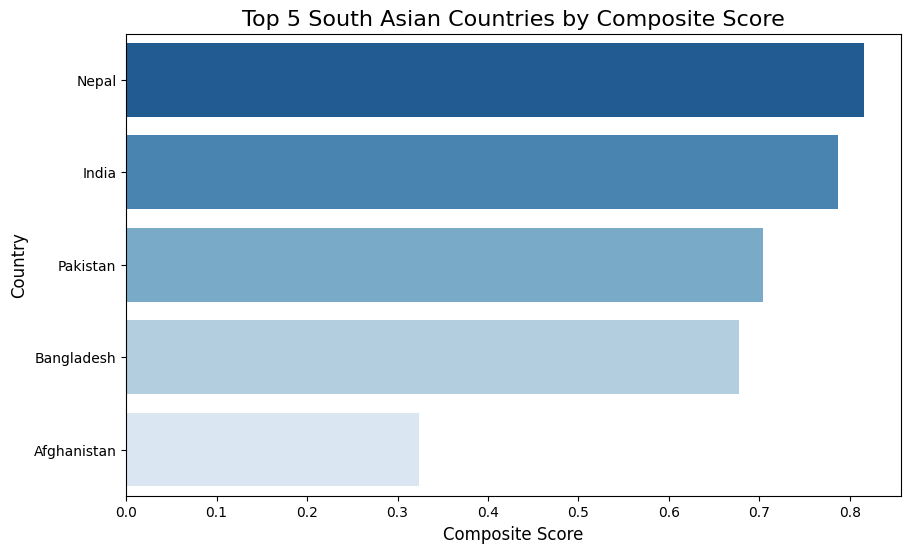

In [96]:
# Select the top 5 countries
top_5_south_asia = south_asia_data.head(5)
print(top_5_south_asia)
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_south_asia, palette='Blues_r')
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

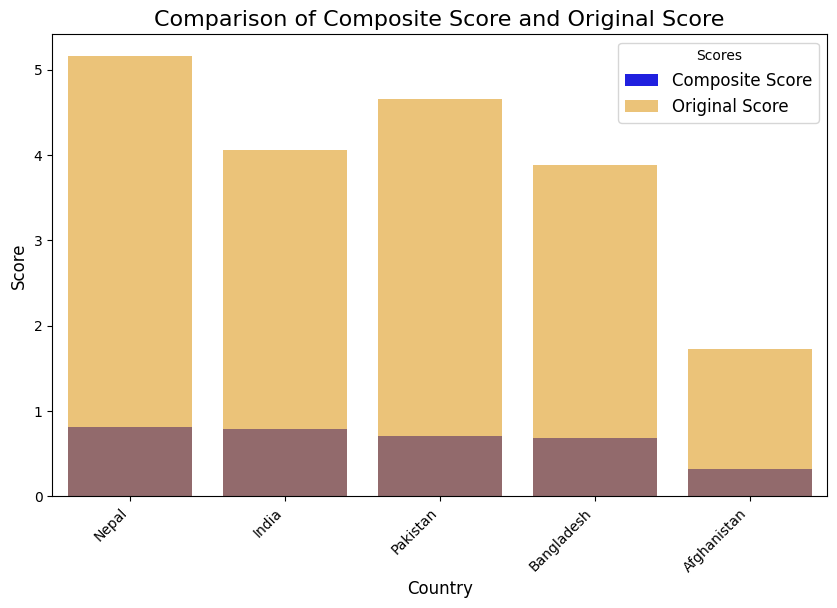

In [97]:
# Task 4: Compare rankings using a grouped bar chart
# Plot to compare Composite Score and Original Score for all South Asian countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Composite Score', data=south_asia_data, label='Composite Score', color='blue')
sns.barplot(x='Country name', y='score', data=south_asia_data, label='Original Score', color='orange', alpha=0.6)
plt.title('Comparison of Composite Score and Original Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scores', fontsize=12)
plt.show()

**Task - 3 - Outlier Detection:**

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

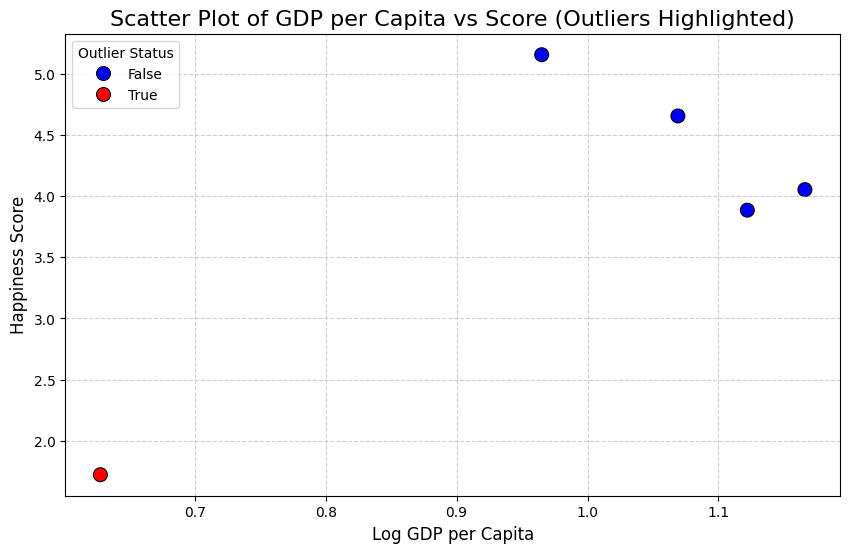

In [98]:

# 1. Identify Outliers in South Asia based on Score and GDP per Capita
# Define the 1.5 × IQR rule to detect outliers

def detect_outliers(column):
    Q1 = south_asia_data[column].quantile(0.25)  # First quartile
    Q3 = south_asia_data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    return (south_asia_data[column] < lower_bound) | (south_asia_data[column] > upper_bound)

# Apply the outlier detection function
south_asia_data['Score Outlier'] = detect_outliers('score')
south_asia_data['GDP Outlier'] = detect_outliers('Log GDP per capita')

# Combine both outliers for visualization
south_asia_data['Outlier'] = south_asia_data['Score Outlier'] | south_asia_data['GDP Outlier']

# 2. Scatter Plot with Outliers Highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=south_asia_data,
    hue='Outlier',
    palette={False: 'blue', True: 'red'},
    s=100,
    edgecolor='black'
)
plt.title('Scatter Plot of GDP per Capita vs Score (Outliers Highlighted)', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Outlier Status', loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()



3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

In [99]:
# 3. Discussing Outliers
outlier_countries = south_asia_data[south_asia_data['Outlier']]
print("Outlier Countries in South Asia:")
print(outlier_countries[['Country name', 'score', 'Log GDP per capita']])

Outlier Countries in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [116]:
# 4. Potential Impact on Regional Averages
# Calculating the regional averages with and without outliers
regional_avg_with_outliers = south_asia_data[['score', 'Log GDP per capita']].mean()
regional_avg_without_outliers = south_asia_data[~south_asia_data['Outlier']][['score', 'Log GDP per capita']].mean()

print("\nRegional Averages (With Outliers):")
print(regional_avg_with_outliers)

print("\nRegional Averages (Without Outliers):")
print(regional_avg_without_outliers)


Regional Averages (With Outliers):
score                 3.8952
Log GDP per capita    0.9900
dtype: float64

Regional Averages (Without Outliers):
score                 4.43875
Log GDP per capita    1.08050
dtype: float64


**Task - 4 - Exploring Trends Across Metrics:**
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.



In [101]:
# 1. Calculate Pearson Correlation for Two Metrics with Score
# Choose metrics: Freedom to Make Life Choices and Generosity
chosen_metrics = ['Freedom to make life choices', 'Generosity']

# Calculate Pearson correlation for the chosen metrics with Score
correlations = {
    metric: south_asia_data['score'].corr(south_asia_data[metric]) for metric in chosen_metrics
}

print("Pearson Correlations with Score:")
for metric, corr in correlations.items():
    print(f"{metric}: {corr:.3f}")

Pearson Correlations with Score:
Freedom to make life choices: 0.801
Generosity: 0.877


2. Create scatter plots with trendlines for these metrics against the Score.

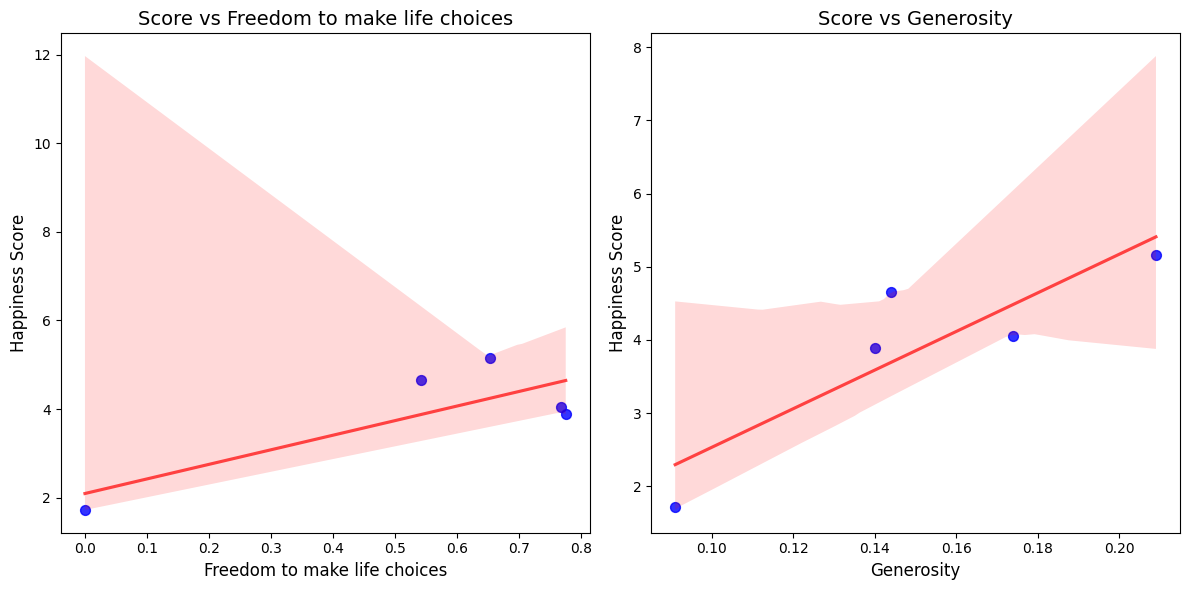

In [102]:
# 2. Scatter Plots with Trendlines
plt.figure(figsize=(12, 6))

for i, metric in enumerate(chosen_metrics, start=1):
    plt.subplot(1, 2, i)
    sns.regplot(
        x=metric,
        y='score',
        data=south_asia_data,
        scatter_kws={'color': 'blue', 's': 50},
        line_kws={'color': 'red', 'alpha': 0.7}
    )
    plt.title(f'Score vs {metric}', fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)

plt.tight_layout()
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [103]:
# 3. Discussion of Strongest and Weakest Relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print("\nAnalysis:")
print(f"The strongest relationship is between Score and {strongest_metric} (Correlation: {correlations[strongest_metric]:.3f}).")
print(f"The weakest relationship is between Score and {weakest_metric} (Correlation: {correlations[weakest_metric]:.3f}).")


Analysis:
The strongest relationship is between Score and Generosity (Correlation: 0.877).
The weakest relationship is between Score and Freedom to make life choices (Correlation: 0.801).


**Task - 5 - Gap Analysis:**
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.



In [104]:
# 1. Add a new column: GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']






2. Rank the South Asian countries by this gap in both ascending and descending order.

In [105]:
# 2. Rank the South Asian countries by GDP-Score Gap
# Sort in ascending and descending order
gap_sorted_ascending = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True)
gap_sorted_descending = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

print("Top Countries by GDP-Score Gap (Descending):")
print(gap_sorted_descending[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

print("\nTop Countries by GDP-Score Gap (Ascending):")
print(gap_sorted_ascending[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])


Top Countries by GDP-Score Gap (Descending):
    Country name  Log GDP per capita  score  GDP-Score Gap
142  Afghanistan               0.628  1.721         -1.093
128   Bangladesh               1.122  3.886         -2.764
125        India               1.166  4.054         -2.888
107     Pakistan               1.069  4.657         -3.588
92         Nepal               0.965  5.158         -4.193

Top Countries by GDP-Score Gap (Ascending):
    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.


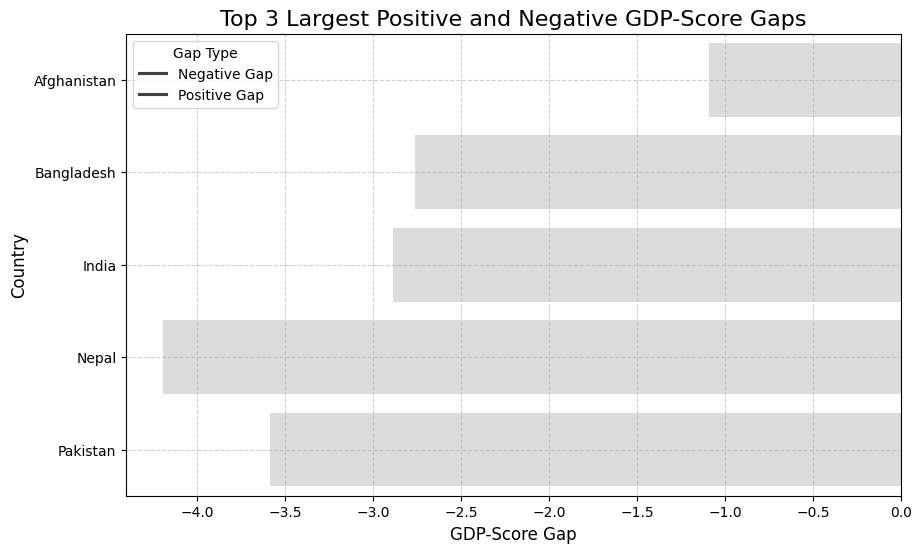

In [106]:
# 3. Highlight the top 3 countries with largest positive and negative gaps using a bar chart
# Select top 3 largest positive and negative gaps
top_positive_gaps = gap_sorted_descending.head(3)
top_negative_gaps = gap_sorted_ascending.head(3)

# Combine the two sets for visualization
highlighted_gaps = pd.concat([top_positive_gaps, top_negative_gaps])

# Bar chart visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='GDP-Score Gap',
    y='Country name',
    data=highlighted_gaps,
    palette='coolwarm',
    hue=(highlighted_gaps['GDP-Score Gap'] > 0)
)
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps', fontsize=16)
plt.xlabel('GDP-Score Gap', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Gap Type', labels=['Negative Gap', 'Positive Gap'])
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [107]:
# 4. Analysis of Gaps
print("\nAnalysis of Gaps:")
print("1. Positive Gaps: Countries with high GDP relative to Score indicate underutilization of wealth for improving happiness.")
print("2. Negative Gaps: Countries with low GDP but high Scores suggest strong social or cultural factors contributing to happiness.")



Analysis of Gaps:
1. Positive Gaps: Countries with high GDP relative to Score indicate underutilization of wealth for improving happiness.
2. Negative Gaps: Countries with low GDP but high Scores suggest strong social or cultural factors contributing to happiness.


**3.3 Problem - 3 - Comparative Analysis:**

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [108]:
# Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east_data = df[df['Country name'].isin(middle_east_countries)]
middle_east_output_path = '/content/drive/MyDrive/Middle_East_Dataset.csv'
middle_east_data.to_csv(middle_east_output_path, index=False)

1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [109]:
# Task 1: Descriptive Statistics
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()

middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print("Descriptive Statistics:")
print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")


Descriptive Statistics:
South Asia - Mean Score: 3.90, Std Dev: 1.32
Middle East - Mean Score: 5.41, Std Dev: 1.57


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

<ipython-input-110-b410e3180f5a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country name', x='score', data=pd.concat([top_3_south_asia, bottom_3_south_asia]), palette='Blues_r')
<ipython-input-110-b410e3180f5a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country name', x='score', data=pd.concat([top_3_middle_east, bottom_3_middle_east]), palette='Oranges_r')


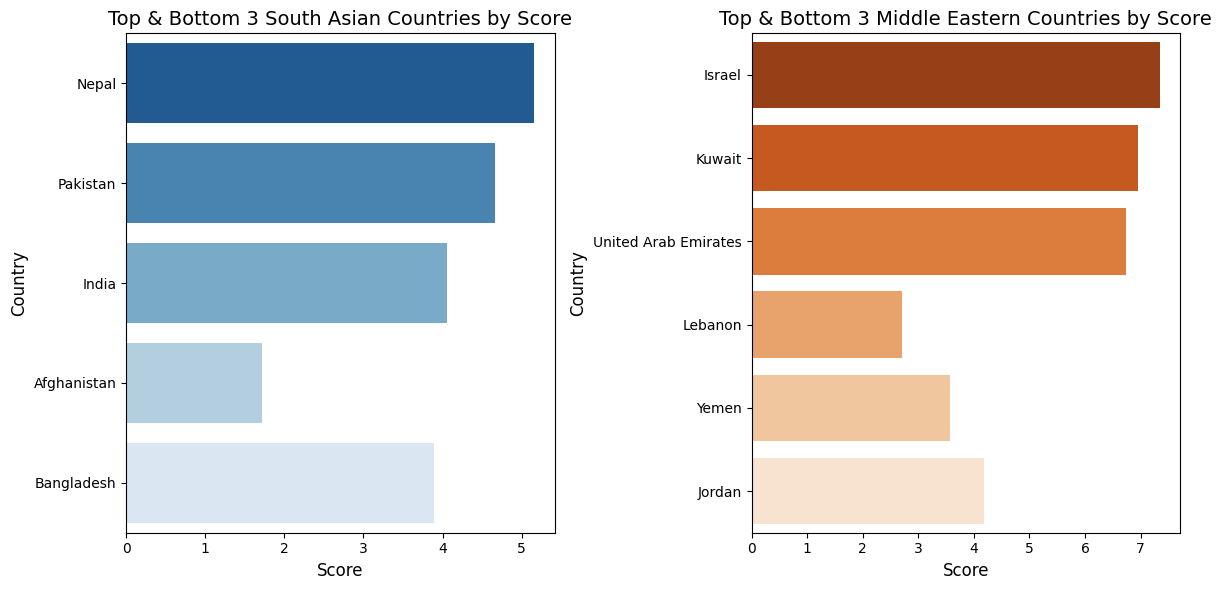

In [110]:
# Task 2: Top and Bottom Performers
# Top 3 and Bottom 3 for South Asia
top_3_south_asia = south_asia_data.nlargest(3, 'score')
bottom_3_south_asia = south_asia_data.nsmallest(3, 'score')

# Top 3 and Bottom 3 for Middle East
top_3_middle_east = middle_east_data.nlargest(3, 'score')
bottom_3_middle_east = middle_east_data.nsmallest(3, 'score')

# Plotting Top 3 and Bottom 3 Bar Charts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(y='Country name', x='score', data=pd.concat([top_3_south_asia, bottom_3_south_asia]), palette='Blues_r')
plt.title('Top & Bottom 3 South Asian Countries by Score', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(y='Country name', x='score', data=pd.concat([top_3_middle_east, bottom_3_middle_east]), palette='Oranges_r')
plt.title('Top & Bottom 3 Middle Eastern Countries by Score', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

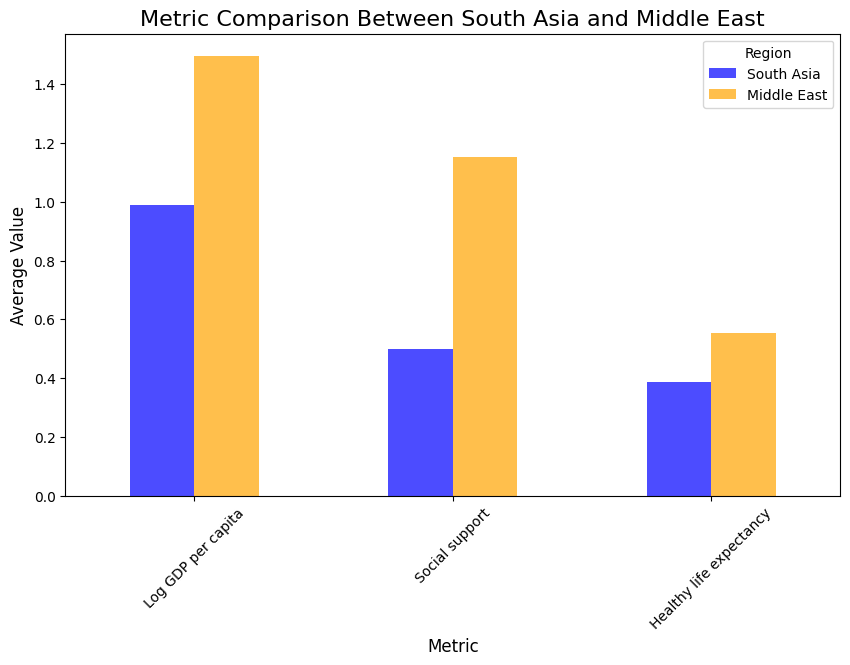

In [111]:
# Task 3: Metric Comparisons
key_metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Compute means for the two regions
metric_comparison = pd.DataFrame({
    "Metric": key_metrics,
    "South Asia": [south_asia_data[metric].mean() for metric in key_metrics],
    "Middle East": [middle_east_data[metric].mean() for metric in key_metrics]
}).set_index('Metric')

# Plot Grouped Bar Charts
metric_comparison.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'], alpha=0.7)
plt.title('Metric Comparison Between South Asia and Middle East', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [112]:
# Task 4: Happiness Disparity
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
south_asia_cv = south_asia_data['score'].std() / south_asia_data['score'].mean()

middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

print("Happiness Disparity:")
print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")


Happiness Disparity:
South Asia - Range: 3.44, CV: 0.34
Middle East - Range: 4.63, CV: 0.29


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.


Correlation Analysis:
South Asia:
Freedom to make life choices: 0.801
Generosity: 0.877
Middle East:
Freedom to make life choices: 0.863
Generosity: 0.628


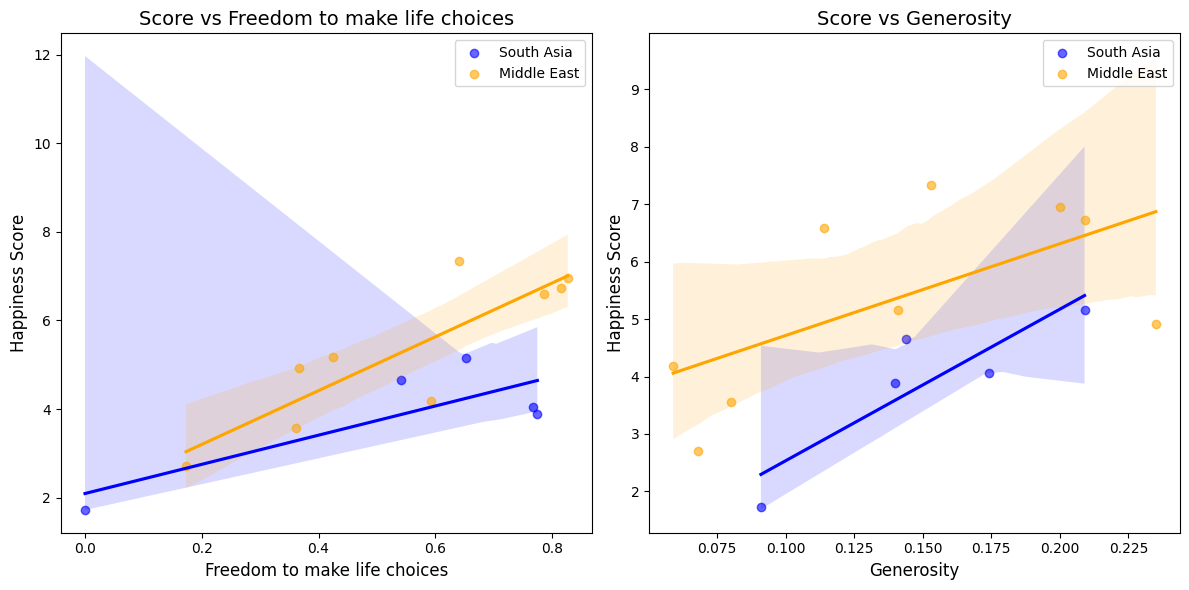

In [113]:
# Task 5: Correlation Analysis
correlations_sa = {
    metric: south_asia_data['score'].corr(south_asia_data[metric]) for metric in ['Freedom to make life choices', 'Generosity']
}

correlations_me = {
    metric: middle_east_data['score'].corr(middle_east_data[metric]) for metric in ['Freedom to make life choices', 'Generosity']
}

print("\nCorrelation Analysis:")
print("South Asia:")
for metric, corr in correlations_sa.items():
    print(f"{metric}: {corr:.3f}")

print("Middle East:")
for metric, corr in correlations_me.items():
    print(f"{metric}: {corr:.3f}")

# Scatter plots with trendlines
plt.figure(figsize=(12, 6))
for i, metric in enumerate(['Freedom to make life choices', 'Generosity'], start=1):
    plt.subplot(1, 2, i)
    sns.regplot(x=metric, y='score', data=south_asia_data, label='South Asia', color='blue', scatter_kws={'alpha': 0.6})
    sns.regplot(x=metric, y='score', data=middle_east_data, label='Middle East', color='orange', scatter_kws={'alpha': 0.6})
    plt.title(f'Score vs {metric}', fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()

6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

<ipython-input-114-26d87fdced61>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_data['Outlier'] = detect_outliers('score', middle_east_data) | detect_outliers('Log GDP per capita', middle_east_data)


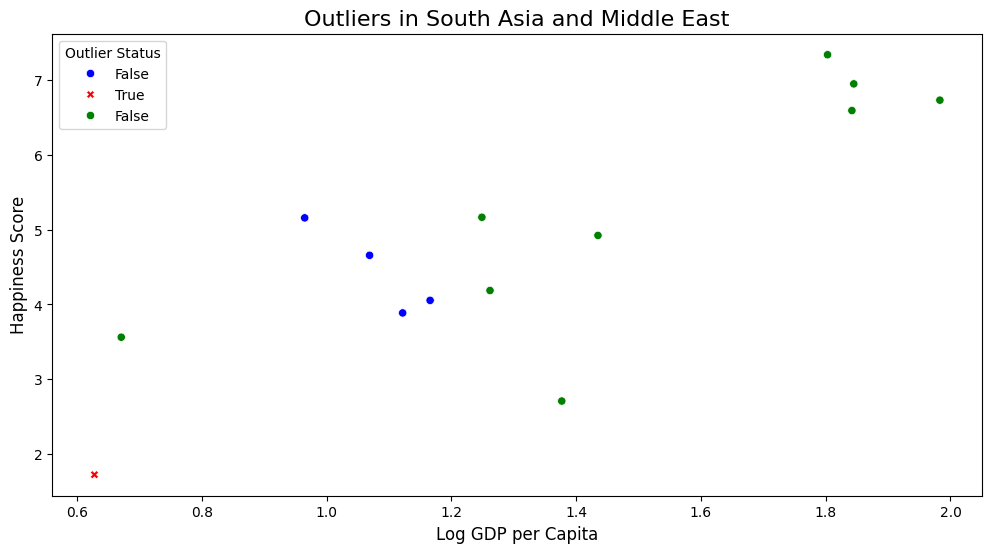

In [114]:
# Task 6: Outlier Detection
def detect_outliers(column, data):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

south_asia_data['Outlier'] = detect_outliers('score', south_asia_data) | detect_outliers('Log GDP per capita', south_asia_data)
middle_east_data['Outlier'] = detect_outliers('score', middle_east_data) | detect_outliers('Log GDP per capita', middle_east_data)

# Scatter plot for outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, hue='Outlier', style='Outlier', palette={True: 'red', False: 'blue'})
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, hue='Outlier', style='Outlier', palette={True: 'orange', False: 'green'})
plt.title('Outliers in South Asia and Middle East', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Outlier Status')
plt.show()

7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

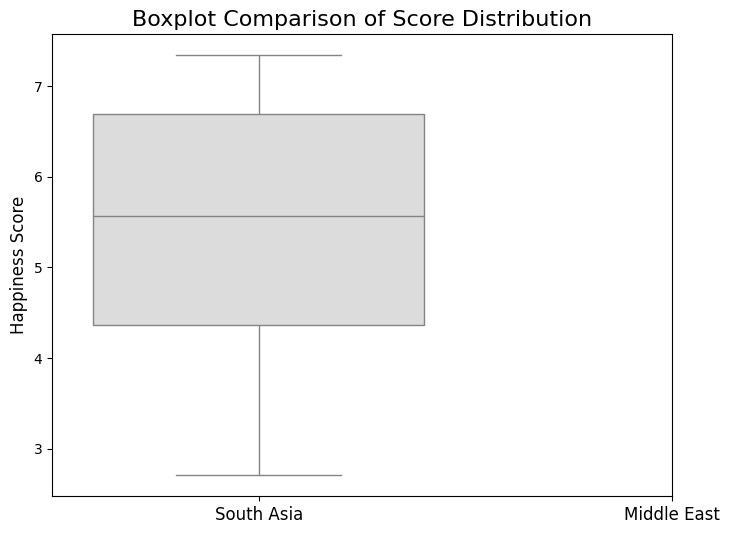

In [115]:
# Task 7: Boxplots for Score Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_data['score'], middle_east_data['score']], palette='coolwarm')
plt.xticks([0, 1], ['South Asia', 'Middle East'], fontsize=12)
plt.title('Boxplot Comparison of Score Distribution', fontsize=16)
plt.ylabel('Happiness Score', fontsize=12)
plt.show()